In [1]:
import pandas as pd
import numpy as np
import json 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = 1000

In [2]:
google_play_raw = pd.read_csv('googleplaystore.csv')

In [3]:
google_play_raw.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
google_play_raw.sample(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7176,Kiosque CD,TRAVEL_AND_LOCAL,NaN,0,22M,5+,Free,0,Everyone,Travel & Local,"June 18, 2018",4.6.2201,4.3 and up
745,NeuroNation - Focus and Brain Training,EDUCATION,4.5,248555,Varies with device,"5,000,000+",Free,0,Everyone,Education;Brain Games,"May 23, 2018",Varies with device,4.0.3 and up
9068,My Dy Dice - 3D Dice Roller,LIFESTYLE,4.2,9,22M,100+,Free,0,Everyone,Lifestyle,"September 20, 2016",1.01,4.1 and up


In [5]:
google_play_raw.Category.value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
COMICS                   60
PARENTING                60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [6]:
google_play_raw.Genres.value_counts().head(20)

Tools                842
Entertainment        623
Education            549
Medical              463
Business             460
Productivity         424
Sports               398
Personalization      392
Communication        387
Lifestyle            381
Finance              366
Action               365
Health & Fitness     341
Photography          335
Social               295
News & Magazines     283
Shopping             260
Travel & Local       257
Dating               234
Books & Reference    231
Name: Genres, dtype: int64

In [7]:
# Checking if there's any apps have 5 star ratings
fivestars_ratings = google_play_raw.loc[google_play_raw['Rating'] == 5, ['App','text','Rating','Reviews','Installs']]
fivestars_ratings

,App,text,Rating,Reviews,Installs
329,Hojiboy Tojiboyev Life Hacks,NaN,5.0,15,"1,000+"
612,American Girls Mobile Numbers,NaN,5.0,5,"1,000+"
615,Awake Dating,NaN,5.0,2,100+
633,Spine- The dating app,NaN,5.0,5,500+
636,Girls Live Talk - Free Text and Video Chat,NaN,5.0,6,100+
640,Online Girls Chat Group,NaN,5.0,5,100+
654,Speeding Joyride & Car Meet App,NaN,5.0,3,100+
1028,SUMMER SONIC app,NaN,5.0,4,500+
1030,Prosperity,NaN,5.0,16,100+
1038,Mindvalley U Tallinn 2018,NaN,5.0,1,100+


In [8]:
len(fivestars_ratings)

274

In [9]:
# Check if there's any app has rating over 5, which means the data might be noisy 
google_play_raw.loc[google_play_raw["Rating"] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [10]:
def value_to_float(x):
    """
    Convert the string feature into float.
    If there is 'K' or 'M' in the string, convert it to the corresponding number (1000 or 1000000). 
    """
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 10**3
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 10**6
        return 1000000.0
    
    # If the string cannot be converted, return 0 instead
    try:
        parsed_val = float(x)
    except ValueError:
        parsed_val = 0.0
    return parsed_val

In [11]:
# Clean the data
google_play_cleaned = google_play_raw.loc[google_play_raw["Rating"].notnull()]
google_play_cleaned = google_play_cleaned.loc[google_play_cleaned["Rating"] <= 5]

google_play_cleaned["Price"] = google_play_cleaned["Price"].apply(lambda x: x.replace('$', ''))

top30_genres = google_play_cleaned["Genres"].value_counts().head(30).index
google_play_cleaned["Genres"] = google_play_cleaned["Genres"].apply(lambda x: x if x in top30_genres else "Other")

str_cols = ["Reviews", "Size", "Price"]

for col in str_cols:
    google_play_cleaned[[col]] = google_play_cleaned[[col]].fillna(value="")
    google_play_cleaned[col] = google_play_cleaned[col].apply(value_to_float)

In [12]:
google_play_cleaned.describe()

,Rating,Reviews,Size,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.893322e+07,0.960928
std,0.515219,3.144042e+06,2.302330e+07,15.816585
min,1.000000,1.000000e+00,0.000000e+00,0.000000
25%,4.000000,1.862500e+02,2.400000e+06,0.000000
50%,4.300000,5.930500e+03,9.500000e+06,0.000000
75%,4.500000,8.153275e+04,2.700000e+07,0.000000
max,5.000000,7.815831e+07,1.000000e+08,400.000000


In [13]:
# To get a brief idea about the apps whose prices are higher than $50
google_play_cleaned.loc[google_play_cleaned["Price"] > 50]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000000.0,"1,000+",Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92.0,32000000.0,"1,000+",Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
4197,most expensive app (H),FAMILY,4.3,6.0,1500000.0,100+,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,"10,000+",Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,"10,000+",Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000.0,"100,000+",Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000.0,"10,000+",Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000.0,"10,000+",Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000.0,"50,000+",Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000.0,"1,000+",Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up


Populating the interactive namespace from numpy and matplotlib


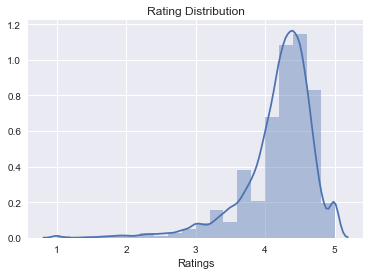

In [14]:
# Perform Exploratory Data Analysis (EDA)
%pylab inline

fig = sns.distplot(google_play_cleaned["Rating"], bins=20)   

fig.set_xlabel('Ratings')
plt.title('Rating Distribution')

In [15]:
top10_category = google_play_cleaned["Category"].value_counts().head(10).index
df_top10_category = google_play_cleaned.loc[google_play_cleaned["Category"].isin(top10_category)]

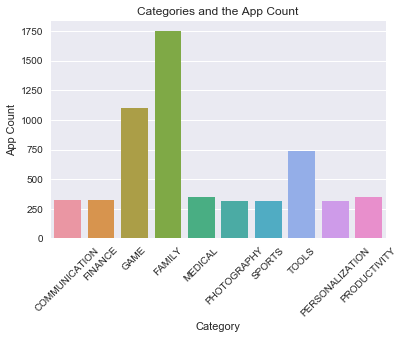

In [16]:
fig = sns.countplot(x="Category", data=df_top10_category)
fig.set_xlabel('Category')

plt.xticks(rotation=45)
plt.title('Categories and the App Count')
plt.ylabel('App Count')

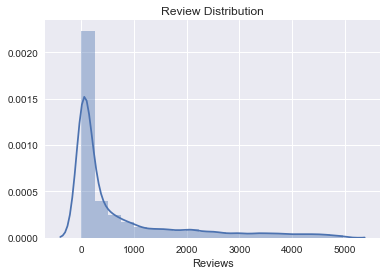

In [17]:
fig = sns.distplot(google_play_cleaned.loc[google_play_cleaned["Reviews"] < 5000, "Reviews"], bins=20)
fig.set_xlabel('Reviews')
plt.title('Review Distribution')

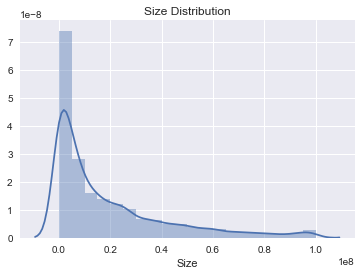

In [18]:
fig = sns.distplot(google_play_cleaned["Size"], bins=20)
fig.set_xlabel('Size')
plt.title('Size Distribution')

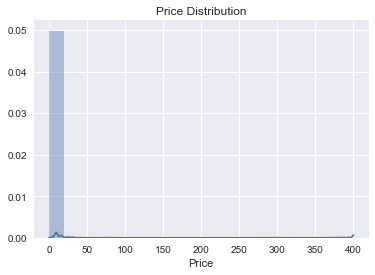

In [19]:
fig = sns.distplot(google_play_cleaned["Price"], bins=20)
fig.set_xlabel('Price')
plt.title('Price Distribution')

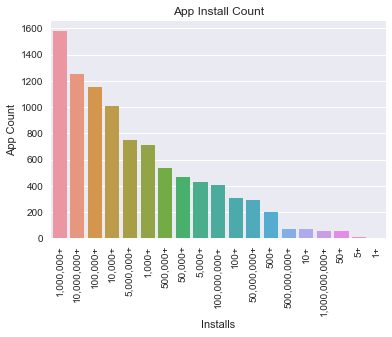

In [20]:
fig = sns.countplot(x="Installs", data=google_play_cleaned, order=google_play_cleaned['Installs'].value_counts().index)
fig.set_xlabel('Installs')

plt.xticks(rotation=90)
plt.title('App Install Count')
plt.ylabel('App Count')

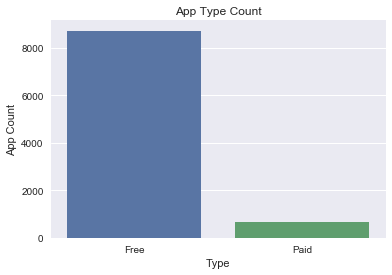

In [21]:
fig = sns.countplot(x="Type", data=google_play_cleaned)
fig.set_xlabel('Type')
plt.title('App Type Count')
plt.ylabel('App Count')

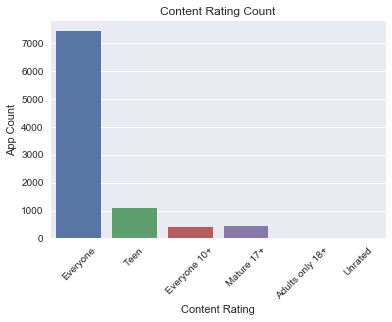

In [22]:
fig = sns.countplot(x="Content Rating", data=google_play_cleaned)
fig.set_xlabel('Content Rating')
plt.xticks(rotation=45)
plt.title('Content Rating Count')
plt.ylabel('App Count')

In [23]:
top10_genres = google_play_cleaned["Genres"].value_counts().head(10).index
df_top10_genres = google_play_cleaned.loc[google_play_cleaned["Genres"].isin(top10_genres)]

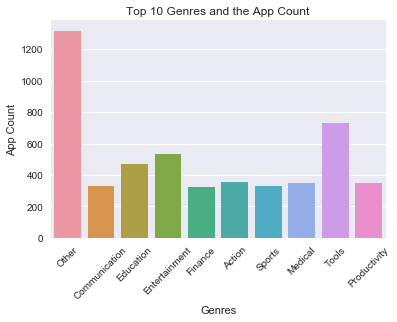

In [24]:
fig = sns.countplot(x="Genres", data=df_top10_genres)
fig.set_xlabel('Genres')

plt.xticks(rotation=45)
plt.title('Top 10 Genres and the App Count')
plt.ylabel('App Count')

In [25]:
top10_android = google_play_cleaned["Android Ver"].value_counts().head(10).index
df_top10_android = google_play_cleaned.loc[google_play_cleaned["Android Ver"].isin(top10_android)]

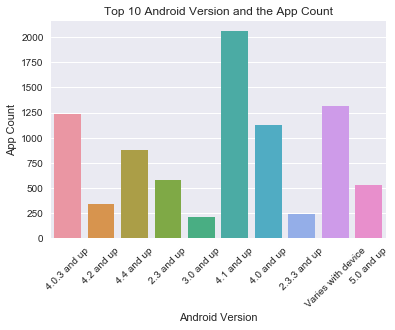

In [26]:
fig = sns.countplot(x="Android Ver", data=df_top10_android)
fig.set_xlabel('Android Version')

plt.xticks(rotation=45)
plt.title('Top 10 Android Version and the App Count')
plt.ylabel('App Count')

In [27]:
google_play_cleaned.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,"10,000+",Free,0.0,Everyone,Other,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,"500,000+",Free,0.0,Everyone,Other,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510.0,8700000.0,"5,000,000+",Free,0.0,Everyone,Other,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,"50,000,000+",Free,0.0,Teen,Other,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,"100,000+",Free,0.0,Everyone,Other,"June 20, 2018",1.1,4.4 and up


In [28]:
# Create one-hot encoding for categorical features
categorical_feeatures = ["Category", "Installs", "Type", "Content Rating", "Genres", "Android Ver"]

for col in categorical_feeatures:
    one_hot = pd.get_dummies(google_play_cleaned[col], prefix=col+"_")
    google_play_cleaned = google_play_cleaned.drop(col, axis=1)
    google_play_cleaned = google_play_cleaned.join(one_hot)
    
google_play_cleaned = google_play_cleaned.drop(["App", "Last Updated", "Current Ver"], axis=1)

In [29]:
features = google_play_cleaned.drop("Rating", axis=1)
labels = google_play_cleaned["Rating"].values

In [30]:
# Split training/test data
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.1, random_state=42)

In [31]:
# Scale the features to make sure they are in similar ranges
min_max_scaler = preprocessing.MinMaxScaler()
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

In [32]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, y_train)

# Make predictions using the train/testing set
y_pred_train = regr.predict(X_train_scaled)
y_pred_test = regr.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print("Mean squared error (train): %.2f"
      % mean_squared_error(y_train, y_pred_train))
print("Mean squared error (test): %.2f"
      % mean_squared_error(y_test, y_pred_test))

# R-squared on training set: 1 is perfect prediction
print('R-squared (train): %.2f' % r2_score(y_train, y_pred_train))
# R-squared on test set: 1 is perfect prediction
print('R-squared (test): %.2f' % r2_score(y_test, y_pred_test))

('Coefficients: \n', array([  3.71735300e-01,  -1.54599536e-02,  -3.93108203e-01,
         4.77079282e+10,   4.77079282e+10,   4.77079282e+10,
         3.99827137e+10,   1.03956666e+11,   4.77079282e+10,
         2.57031107e+11,  -3.88763572e+10,   4.77079282e+10,
         4.77079282e+10,   4.77079282e+10,   4.77079282e+10,
         1.96817269e+10,   1.43217916e+10,   4.77079282e+10,
         6.54324435e+10,   4.77079282e+10,   4.77079282e+10,
         4.77079282e+10,  -3.26006389e+10,  -6.80516054e+10,
         2.46710929e+08,   4.77079282e+10,   2.45281910e+10,
         1.39510794e+10,  -7.89343501e+09,   3.73447814e+10,
         1.35483096e+10,   4.77079282e+10,   4.77079282e+10,
         4.77079282e+10,   4.77079282e+10,   4.77079282e+10,
         6.90629565e+10,   6.90629565e+10,   6.90629565e+10,
         6.90629565e+10,   6.90629565e+10,   6.90629565e+10,
         6.90629565e+10,   6.90629565e+10,   6.90629565e+10,
         6.90629565e+10,   6.90629565e+10,   6.90629565e+10,
   

In [54]:
# Set the parameters by cross-validation
tuned_parameters = [
    {
        'max_depth': [2, 3, 4, 5], 
        'learning_rate': [0.2, 0.1, 0.05, 0.01],
        'subsample': [1.0, 0.9, 0.8]
    }
]

print("# Tuning hyper-parameters")

# Train a GBDT regressor
clf = GridSearchCV(GradientBoostingRegressor(), tuned_parameters, cv=5, scoring="neg_mean_squared_error")
clf.fit(X_train, y_train)

# Tuning hyper-parameters


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'subsample': [1.0, 0.9, 0.8], 'learning_rate': [0.2, 0.1, 0.05, 0.01], 'max_depth': [2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

In [55]:
print("Best parameters set found on training set:")
print(clf.best_params_)

Best parameters set found on training set:
{'subsample': 0.8, 'learning_rate': 0.1, 'max_depth': 4}


In [56]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("Mean squared error = %0.3f for %r" % (-mean, params))

Mean squared error = 0.234 for {'subsample': 1.0, 'learning_rate': 0.2, 'max_depth': 2}
Mean squared error = 0.233 for {'subsample': 0.9, 'learning_rate': 0.2, 'max_depth': 2}
Mean squared error = 0.234 for {'subsample': 0.8, 'learning_rate': 0.2, 'max_depth': 2}
Mean squared error = 0.232 for {'subsample': 1.0, 'learning_rate': 0.2, 'max_depth': 3}
Mean squared error = 0.234 for {'subsample': 0.9, 'learning_rate': 0.2, 'max_depth': 3}
Mean squared error = 0.235 for {'subsample': 0.8, 'learning_rate': 0.2, 'max_depth': 3}
Mean squared error = 0.231 for {'subsample': 1.0, 'learning_rate': 0.2, 'max_depth': 4}
Mean squared error = 0.236 for {'subsample': 0.9, 'learning_rate': 0.2, 'max_depth': 4}
Mean squared error = 0.232 for {'subsample': 0.8, 'learning_rate': 0.2, 'max_depth': 4}
Mean squared error = 0.233 for {'subsample': 1.0, 'learning_rate': 0.2, 'max_depth': 5}
Mean squared error = 0.235 for {'subsample': 0.9, 'learning_rate': 0.2, 'max_depth': 5}
Mean squared error = 0.238 for {

In [57]:
best_estimator = clf.best_estimator_

In [58]:
# Make predictions using the train/testing set
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

# The mean squared error
print("Mean squared error (train): %.2f"
      % mean_squared_error(y_train, y_pred_train))
print("Mean squared error (test): %.2f"
      % mean_squared_error(y_test, y_pred_test))

# R-squared on training set: 1 is perfect prediction
print('R-squared (train): %.2f' % r2_score(y_train, y_pred_train))
# R-squared on test set: 1 is perfect prediction
print('R-squared (test): %.2f' % r2_score(y_test, y_pred_test))

Mean squared error (train): 0.18
Mean squared error (test): 0.20
R-squared (train): 0.32
R-squared (test): 0.14


In [59]:
best_n_estimators = best_estimator.get_params()["n_estimators"]

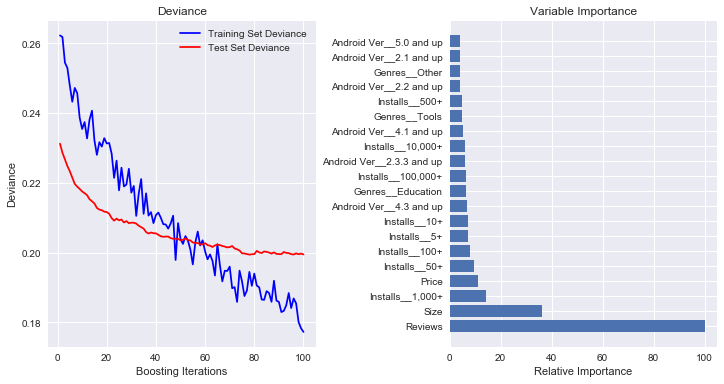

In [60]:
# Plot training deviance

# Compute test set deviance
test_score = np.zeros((best_n_estimators,), dtype=np.float64)
 
for i, y_pred_test in enumerate(best_estimator.staged_predict(X_test)):
    test_score[i] = best_estimator.loss_(y_test, y_pred_test)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=.5)
plt.title('Deviance')
plt.plot(np.arange(best_n_estimators) + 1, best_estimator.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(best_n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Plot feature importance
feature_importance = best_estimator.feature_importances_
num_top_features = 20

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][0:num_top_features]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

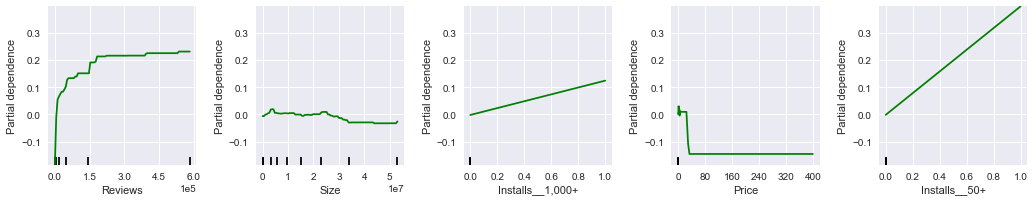

In [61]:
# Plot partial dependence
num_top_features = 5
fig, ax = plot_partial_dependence(best_estimator, X_train, sorted_idx[0:num_top_features], 
                                  n_cols=5, feature_names=X_train.columns, percentiles=(0.1, 0.9))
fig.set_figwidth(16)

In [64]:
threshold = np.percentile(y_train, 20)
threshold

3.8999999999999995

In [65]:
# Transform ratings into binary labels
y_train_binary = (y_train < threshold).astype(int)
y_test_binary = (y_test < threshold).astype(int)

In [66]:
# Set the parameters by cross-validation
tuned_parameters = [
    {
        'max_depth': [3, 4, 5], 
        'learning_rate': [0.3, 0.2, 0.1],
        'subsample': [1.0, 0.9, 0.8]
    }
]

print("# Tuning hyper-parameters")

# Train a GDBT classifier
clf = GridSearchCV(GradientBoostingClassifier(n_estimators=300), tuned_parameters, cv=5, scoring="f1")
clf.fit(X_train, y_train_binary)

# Tuning hyper-parameters


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=300, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'subsample': [1.0, 0.9, 0.8], 'learning_rate': [0.3, 0.2, 0.1], 'max_depth': [3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1', verbose=0)

In [67]:
print("Best parameters set found on training set:")
print(clf.best_params_)

Best parameters set found on training set:
{'subsample': 0.9, 'learning_rate': 0.3, 'max_depth': 5}


In [68]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("F1 score = %0.3f for %r" % (mean, params))

F1 score = 0.298 for {'subsample': 1.0, 'learning_rate': 0.3, 'max_depth': 3}
F1 score = 0.321 for {'subsample': 0.9, 'learning_rate': 0.3, 'max_depth': 3}
F1 score = 0.313 for {'subsample': 0.8, 'learning_rate': 0.3, 'max_depth': 3}
F1 score = 0.346 for {'subsample': 1.0, 'learning_rate': 0.3, 'max_depth': 4}
F1 score = 0.355 for {'subsample': 0.9, 'learning_rate': 0.3, 'max_depth': 4}
F1 score = 0.357 for {'subsample': 0.8, 'learning_rate': 0.3, 'max_depth': 4}
F1 score = 0.344 for {'subsample': 1.0, 'learning_rate': 0.3, 'max_depth': 5}
F1 score = 0.360 for {'subsample': 0.9, 'learning_rate': 0.3, 'max_depth': 5}
F1 score = 0.358 for {'subsample': 0.8, 'learning_rate': 0.3, 'max_depth': 5}
F1 score = 0.254 for {'subsample': 1.0, 'learning_rate': 0.2, 'max_depth': 3}
F1 score = 0.284 for {'subsample': 0.9, 'learning_rate': 0.2, 'max_depth': 3}
F1 score = 0.289 for {'subsample': 0.8, 'learning_rate': 0.2, 'max_depth': 3}
F1 score = 0.320 for {'subsample': 1.0, 'learning_rate': 0.2, 'm

In [69]:
best_estimator = clf.best_estimator_

In [70]:
# Make predictions using the train/testing set
y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

# Accuracy
print("Accuracy (train): %.2f"
      % accuracy_score(y_train_binary, y_pred_train))
print("Accuracy (test): %.2f"
      % accuracy_score(y_test_binary, y_pred_test))

# Precision
print("Precision (train): %.2f"
      % precision_score(y_train_binary, y_pred_train))
print("Precision (test): %.2f"
      % precision_score(y_test_binary, y_pred_test))

# Recall
print("Recall (train): %.2f"
      % recall_score(y_train_binary, y_pred_train))
print("Recall (test): %.2f"
      % recall_score(y_test_binary, y_pred_test))

# F1 score
print("F1 score (train): %.2f"
      % f1_score(y_train_binary, y_pred_train))
print("F1 score (test): %.2f"
      % f1_score(y_test_binary, y_pred_test))

Accuracy (train): 0.99
Accuracy (test): 0.85
Precision (train): 1.00
Precision (test): 0.48
Recall (train): 0.97
Recall (test): 0.35
F1 score (train): 0.98
F1 score (test): 0.40


In [71]:
best_n_estimators = best_estimator.get_params()["n_estimators"]

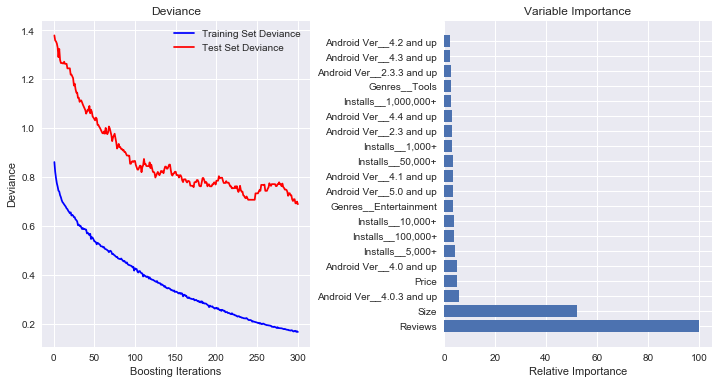

In [72]:
# Plot training deviance

# Compute test set deviance
test_score = np.zeros((best_n_estimators,), dtype=np.float64)
 
for i, y_pred_test in enumerate(best_estimator.staged_predict(X_test)):
    test_score[i] = best_estimator.loss_(y_test, y_pred_test)
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.subplots_adjust(wspace=.5)
plt.title('Deviance')
plt.plot(np.arange(best_n_estimators) + 1, best_estimator.train_score_, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(best_n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

# Plot feature importance
feature_importance = best_estimator.feature_importances_
num_top_features = 20

# Make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[::-1][0:num_top_features]
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

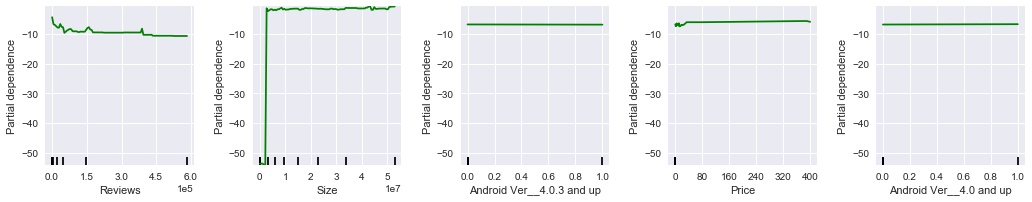

In [73]:
# Plot partial dependence
num_top_features = 5
fig, ax = plot_partial_dependence(best_estimator, X_train, sorted_idx[0:num_top_features], 
                                  n_cols=5, feature_names=X_train.columns, percentiles=(0.1, 0.9))
fig.set_figwidth(16)